### 1.Import Modules


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import BatchNormalization

### 2.Load the dataset

In [2]:
df=pd.read_csv(r'G:\Machine Learning\synthetic_fraud_dataset.csv')
df.head()

,Transaction_ID,User_ID,Transaction_Amount,Transaction_Type,Timestamp,Account_Balance,Device_Type,Location,Merchant_Category,IP_Address_Flag,...,Daily_Transaction_Count,Avg_Transaction_Amount_7d,Failed_Transaction_Count_7d,Card_Type,Card_Age,Transaction_Distance,Authentication_Method,Risk_Score,Is_Weekend,Fraud_Label
0,TXN_33553,USER_1834,39.79,POS,2023-08-14 19:30:00,93213.17,Laptop,Sydney,Travel,0,...,7,437.63,3,Amex,65,883.17,Biometric,0.8494,0,0
1,TXN_9427,USER_7875,1.19,Bank Transfer,2023-06-07 04:01:00,75725.25,Mobile,New York,Clothing,0,...,13,478.76,4,Mastercard,186,2203.36,Password,0.0959,0,1
2,TXN_199,USER_2734,28.96,Online,2023-06-20 15:25:00,1588.96,Tablet,Mumbai,Restaurants,0,...,14,50.01,4,Visa,226,1909.29,Biometric,0.8400,0,1
3,TXN_12447,USER_2617,254.32,ATM Withdrawal,2023-12-07 00:31:00,76807.20,Tablet,New York,Clothing,0,...,8,182.48,4,Visa,76,1311.86,OTP,0.7935,0,1
4,TXN_39489,USER_2014,31.28,POS,2023-11-11 23:44:00,92354.66,Mobile,Mumbai,Electronics,0,...,14,328.69,4,Mastercard,140,966.98,Password,0.3819,1,1


In [3]:
df.shape

(50000, 21)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 21 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Transaction_ID                50000 non-null  object 
 1   User_ID                       50000 non-null  object 
 2   Transaction_Amount            50000 non-null  float64
 3   Transaction_Type              50000 non-null  object 
 4   Timestamp                     50000 non-null  object 
 5   Account_Balance               50000 non-null  float64
 6   Device_Type                   50000 non-null  object 
 7   Location                      50000 non-null  object 
 8   Merchant_Category             50000 non-null  object 
 9   IP_Address_Flag               50000 non-null  int64  
 10  Previous_Fraudulent_Activity  50000 non-null  int64  
 11  Daily_Transaction_Count       50000 non-null  int64  
 12  Avg_Transaction_Amount_7d     50000 non-null  float64
 13  F

In [5]:
df.describe()

,Transaction_Amount,Account_Balance,IP_Address_Flag,Previous_Fraudulent_Activity,Daily_Transaction_Count,Avg_Transaction_Amount_7d,Failed_Transaction_Count_7d,Card_Age,Transaction_Distance,Risk_Score,Is_Weekend,Fraud_Label
count,50000.000000,50000.000000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,99.411012,50294.065981,0.05020,0.098400,7.485240,255.271924,2.003540,119.999940,2499.164155,0.501556,0.299640,0.321340
std,98.687292,28760.458557,0.21836,0.297858,4.039637,141.382279,1.414273,68.985817,1442.013834,0.287774,0.458105,0.466996
min,0.000000,500.480000,0.00000,0.000000,1.000000,10.000000,0.000000,1.000000,0.250000,0.000100,0.000000,0.000000
25%,28.677500,25355.995000,0.00000,0.000000,4.000000,132.087500,1.000000,60.000000,1256.497500,0.254000,0.000000,0.000000
50%,69.660000,50384.430000,0.00000,0.000000,7.000000,256.085000,2.000000,120.000000,2490.785000,0.502250,0.000000,0.000000
75%,138.852500,75115.135000,0.00000,0.000000,11.000000,378.032500,3.000000,180.000000,3746.395000,0.749525,1.000000,1.000000
max,1174.140000,99998.310000,1.00000,1.000000,14.000000,500.000000,4.000000,239.000000,4999.930000,1.000000,1.000000,1.000000


In [6]:
df.isnull().sum()

Transaction_ID                  0
User_ID                         0
Transaction_Amount              0
Transaction_Type                0
Timestamp                       0
Account_Balance                 0
Device_Type                     0
Location                        0
Merchant_Category               0
IP_Address_Flag                 0
Previous_Fraudulent_Activity    0
Daily_Transaction_Count         0
Avg_Transaction_Amount_7d       0
Failed_Transaction_Count_7d     0
Card_Type                       0
Card_Age                        0
Transaction_Distance            0
Authentication_Method           0
Risk_Score                      0
Is_Weekend                      0
Fraud_Label                     0
dtype: int64

In [7]:
df.isna().sum()

Transaction_ID                  0
User_ID                         0
Transaction_Amount              0
Transaction_Type                0
Timestamp                       0
Account_Balance                 0
Device_Type                     0
Location                        0
Merchant_Category               0
IP_Address_Flag                 0
Previous_Fraudulent_Activity    0
Daily_Transaction_Count         0
Avg_Transaction_Amount_7d       0
Failed_Transaction_Count_7d     0
Card_Type                       0
Card_Age                        0
Transaction_Distance            0
Authentication_Method           0
Risk_Score                      0
Is_Weekend                      0
Fraud_Label                     0
dtype: int64

In [8]:
df.duplicated().sum()

np.int64(0)

In [9]:
df.head()

,Transaction_ID,User_ID,Transaction_Amount,Transaction_Type,Timestamp,Account_Balance,Device_Type,Location,Merchant_Category,IP_Address_Flag,...,Daily_Transaction_Count,Avg_Transaction_Amount_7d,Failed_Transaction_Count_7d,Card_Type,Card_Age,Transaction_Distance,Authentication_Method,Risk_Score,Is_Weekend,Fraud_Label
0,TXN_33553,USER_1834,39.79,POS,2023-08-14 19:30:00,93213.17,Laptop,Sydney,Travel,0,...,7,437.63,3,Amex,65,883.17,Biometric,0.8494,0,0
1,TXN_9427,USER_7875,1.19,Bank Transfer,2023-06-07 04:01:00,75725.25,Mobile,New York,Clothing,0,...,13,478.76,4,Mastercard,186,2203.36,Password,0.0959,0,1
2,TXN_199,USER_2734,28.96,Online,2023-06-20 15:25:00,1588.96,Tablet,Mumbai,Restaurants,0,...,14,50.01,4,Visa,226,1909.29,Biometric,0.8400,0,1
3,TXN_12447,USER_2617,254.32,ATM Withdrawal,2023-12-07 00:31:00,76807.20,Tablet,New York,Clothing,0,...,8,182.48,4,Visa,76,1311.86,OTP,0.7935,0,1
4,TXN_39489,USER_2014,31.28,POS,2023-11-11 23:44:00,92354.66,Mobile,Mumbai,Electronics,0,...,14,328.69,4,Mastercard,140,966.98,Password,0.3819,1,1


In [10]:
df=df.drop(['User_ID'],axis=1)
df.head()

,Transaction_ID,Transaction_Amount,Transaction_Type,Timestamp,Account_Balance,Device_Type,Location,Merchant_Category,IP_Address_Flag,Previous_Fraudulent_Activity,Daily_Transaction_Count,Avg_Transaction_Amount_7d,Failed_Transaction_Count_7d,Card_Type,Card_Age,Transaction_Distance,Authentication_Method,Risk_Score,Is_Weekend,Fraud_Label
0,TXN_33553,39.79,POS,2023-08-14 19:30:00,93213.17,Laptop,Sydney,Travel,0,0,7,437.63,3,Amex,65,883.17,Biometric,0.8494,0,0
1,TXN_9427,1.19,Bank Transfer,2023-06-07 04:01:00,75725.25,Mobile,New York,Clothing,0,0,13,478.76,4,Mastercard,186,2203.36,Password,0.0959,0,1
2,TXN_199,28.96,Online,2023-06-20 15:25:00,1588.96,Tablet,Mumbai,Restaurants,0,0,14,50.01,4,Visa,226,1909.29,Biometric,0.8400,0,1
3,TXN_12447,254.32,ATM Withdrawal,2023-12-07 00:31:00,76807.20,Tablet,New York,Clothing,0,0,8,182.48,4,Visa,76,1311.86,OTP,0.7935,0,1
4,TXN_39489,31.28,POS,2023-11-11 23:44:00,92354.66,Mobile,Mumbai,Electronics,0,1,14,328.69,4,Mastercard,140,966.98,Password,0.3819,1,1


In [11]:
df=df.drop(['Transaction_ID'],axis=1)
df.head()

,Transaction_Amount,Transaction_Type,Timestamp,Account_Balance,Device_Type,Location,Merchant_Category,IP_Address_Flag,Previous_Fraudulent_Activity,Daily_Transaction_Count,Avg_Transaction_Amount_7d,Failed_Transaction_Count_7d,Card_Type,Card_Age,Transaction_Distance,Authentication_Method,Risk_Score,Is_Weekend,Fraud_Label
0,39.79,POS,2023-08-14 19:30:00,93213.17,Laptop,Sydney,Travel,0,0,7,437.63,3,Amex,65,883.17,Biometric,0.8494,0,0
1,1.19,Bank Transfer,2023-06-07 04:01:00,75725.25,Mobile,New York,Clothing,0,0,13,478.76,4,Mastercard,186,2203.36,Password,0.0959,0,1
2,28.96,Online,2023-06-20 15:25:00,1588.96,Tablet,Mumbai,Restaurants,0,0,14,50.01,4,Visa,226,1909.29,Biometric,0.8400,0,1
3,254.32,ATM Withdrawal,2023-12-07 00:31:00,76807.20,Tablet,New York,Clothing,0,0,8,182.48,4,Visa,76,1311.86,OTP,0.7935,0,1
4,31.28,POS,2023-11-11 23:44:00,92354.66,Mobile,Mumbai,Electronics,0,1,14,328.69,4,Mastercard,140,966.98,Password,0.3819,1,1


### 3.Label Encoding

In [12]:
df['Transaction_Type'] = df['Transaction_Type'].astype('category')
df['Transaction_Type'] = df['Transaction_Type'].cat.codes

In [13]:
df['Location'] = df['Location'].astype('category')
df['Location'] = df['Location'].cat.codes

In [14]:
df['Device_Type'] = df['Device_Type'].astype('category')
df['Device_Type'] = df['Device_Type'].cat.codes

In [15]:
df['Merchant_Category'] = df['Merchant_Category'].astype('category')
df['Merchant_Category'] = df['Merchant_Category'].cat.codes

In [16]:
df['Card_Type'] = df['Card_Type'].astype('category')
df['Card_Type'] = df['Card_Type'].cat.codes

In [17]:
df['Authentication_Method'] = df['Authentication_Method'].astype('category')
df['Authentication_Method'] = df['Authentication_Method'].cat.codes

In [18]:
df.head()

,Transaction_Amount,Transaction_Type,Timestamp,Account_Balance,Device_Type,Location,Merchant_Category,IP_Address_Flag,Previous_Fraudulent_Activity,Daily_Transaction_Count,Avg_Transaction_Amount_7d,Failed_Transaction_Count_7d,Card_Type,Card_Age,Transaction_Distance,Authentication_Method,Risk_Score,Is_Weekend,Fraud_Label
0,39.79,3,2023-08-14 19:30:00,93213.17,0,3,4,0,0,7,437.63,3,0,65,883.17,0,0.8494,0,0
1,1.19,1,2023-06-07 04:01:00,75725.25,1,2,0,0,0,13,478.76,4,2,186,2203.36,3,0.0959,0,1
2,28.96,2,2023-06-20 15:25:00,1588.96,2,1,3,0,0,14,50.01,4,3,226,1909.29,0,0.8400,0,1
3,254.32,0,2023-12-07 00:31:00,76807.20,2,2,0,0,0,8,182.48,4,3,76,1311.86,1,0.7935,0,1
4,31.28,3,2023-11-11 23:44:00,92354.66,1,1,1,0,1,14,328.69,4,2,140,966.98,3,0.3819,1,1


In [19]:
df=df.drop(['Timestamp'],axis=1)
df.head()

,Transaction_Amount,Transaction_Type,Account_Balance,Device_Type,Location,Merchant_Category,IP_Address_Flag,Previous_Fraudulent_Activity,Daily_Transaction_Count,Avg_Transaction_Amount_7d,Failed_Transaction_Count_7d,Card_Type,Card_Age,Transaction_Distance,Authentication_Method,Risk_Score,Is_Weekend,Fraud_Label
0,39.79,3,93213.17,0,3,4,0,0,7,437.63,3,0,65,883.17,0,0.8494,0,0
1,1.19,1,75725.25,1,2,0,0,0,13,478.76,4,2,186,2203.36,3,0.0959,0,1
2,28.96,2,1588.96,2,1,3,0,0,14,50.01,4,3,226,1909.29,0,0.8400,0,1
3,254.32,0,76807.20,2,2,0,0,0,8,182.48,4,3,76,1311.86,1,0.7935,0,1
4,31.28,3,92354.66,1,1,1,0,1,14,328.69,4,2,140,966.98,3,0.3819,1,1


In [20]:
df['Fraud_Label'].value_counts(dropna=False)

Fraud_Label
0    33933
1    16067
Name: count, dtype: int64

### 4.Visualization

(array([3.4441e+04, 1.0935e+04, 3.2460e+03, 9.6600e+02, 2.8200e+02,
        8.6000e+01, 2.7000e+01, 1.4000e+01, 2.0000e+00, 1.0000e+00]),
 array([   0.   ,  117.414,  234.828,  352.242,  469.656,  587.07 ,
         704.484,  821.898,  939.312, 1056.726, 1174.14 ]),
 <BarContainer object of 10 artists>)

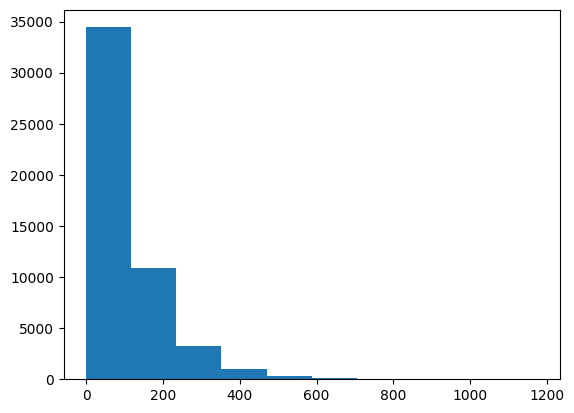

In [21]:
plt.hist(df['Transaction_Amount'])

C:\Users\Pavithra R\AppData\Local\Temp\ipykernel_2152\3850200769.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Location'],hist=False)


<Axes: xlabel='Location', ylabel='Density'>

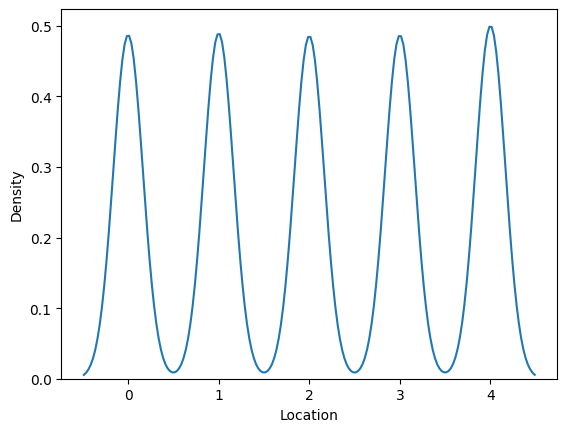

In [22]:
sns.distplot(df['Location'],hist=False)

### 5.Outlier Detection

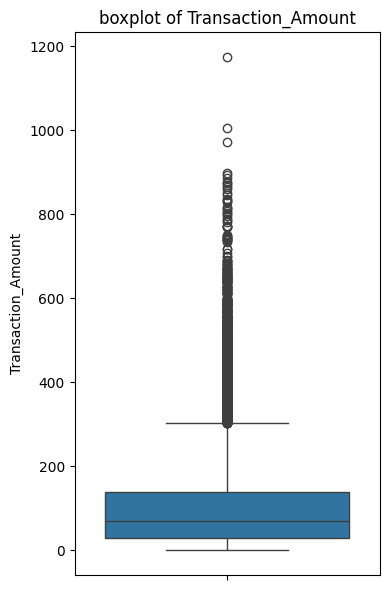

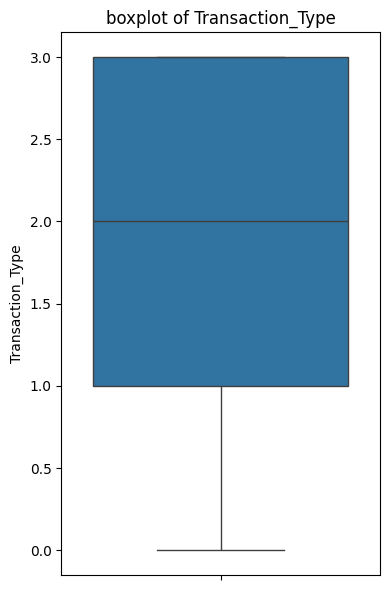

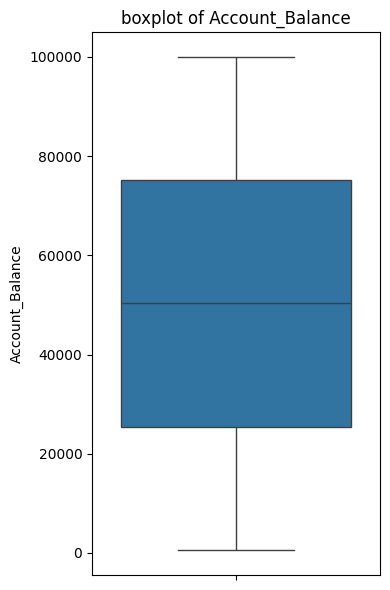

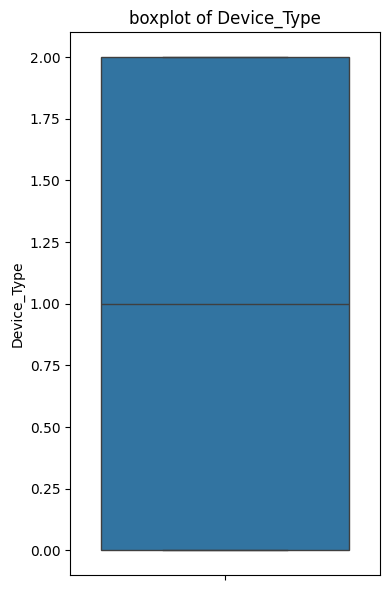

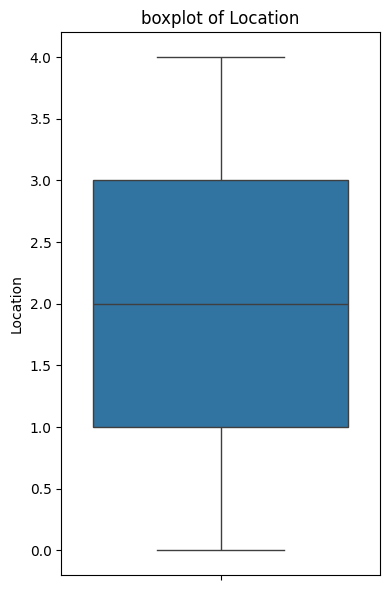

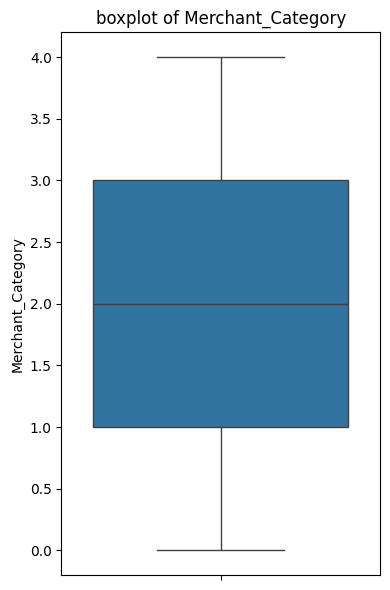

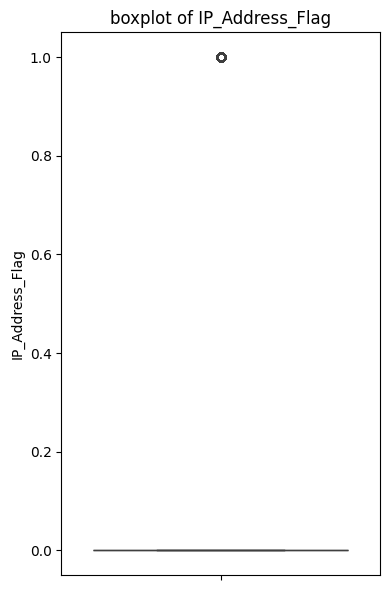

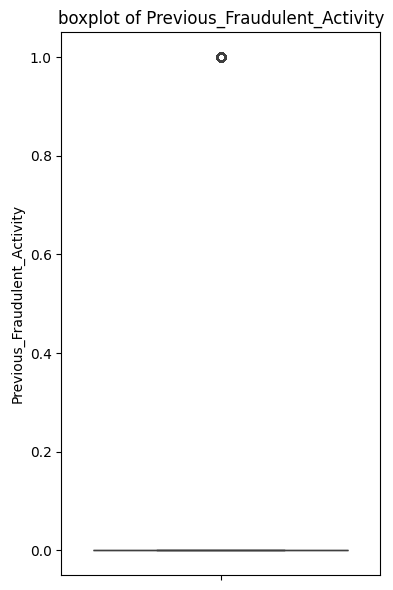

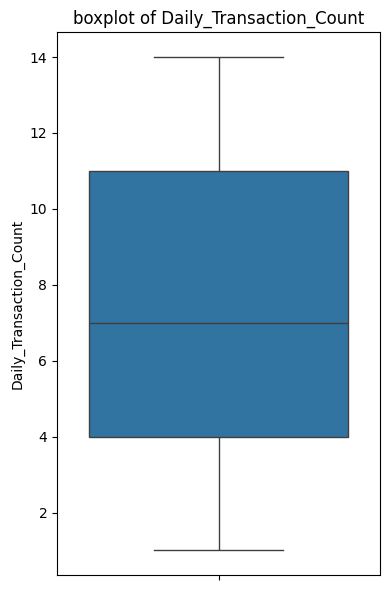

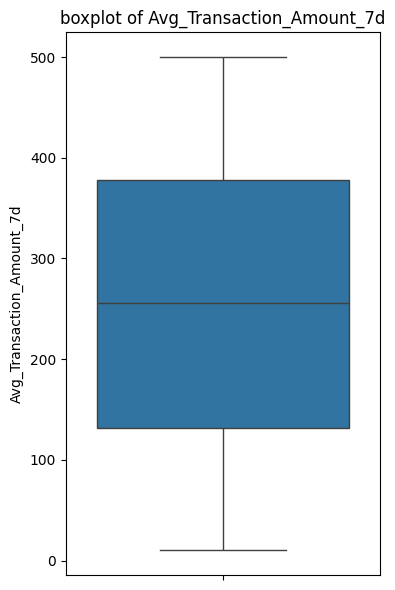

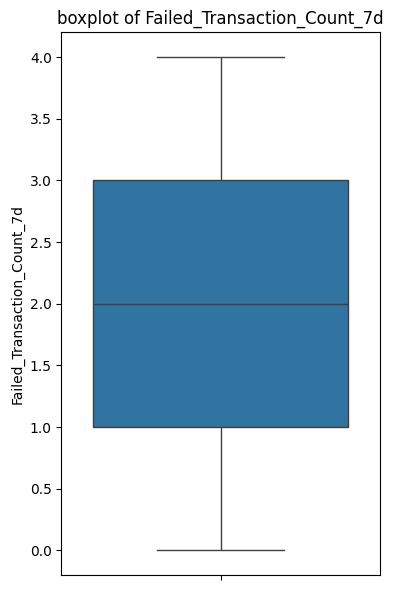

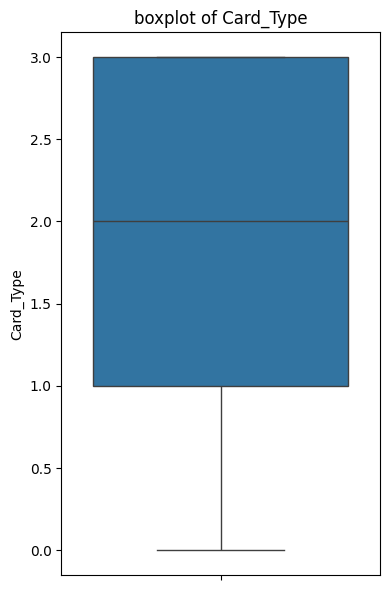

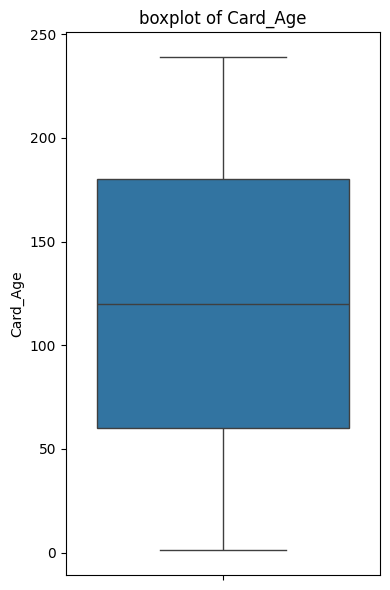

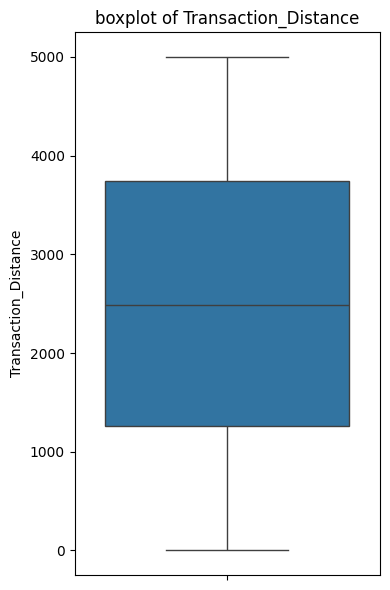

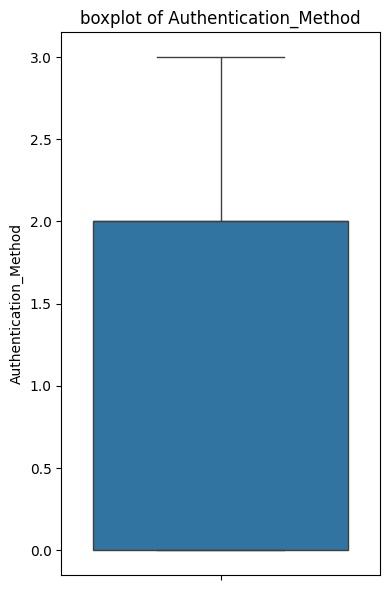

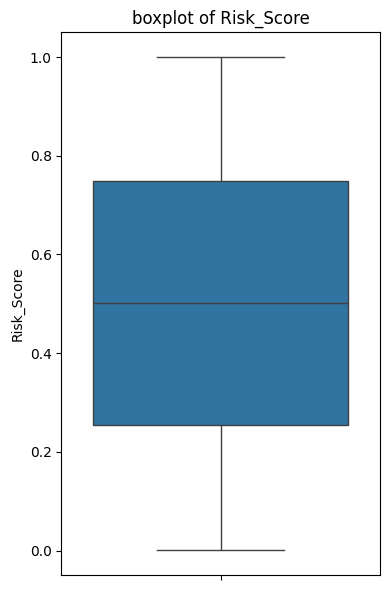

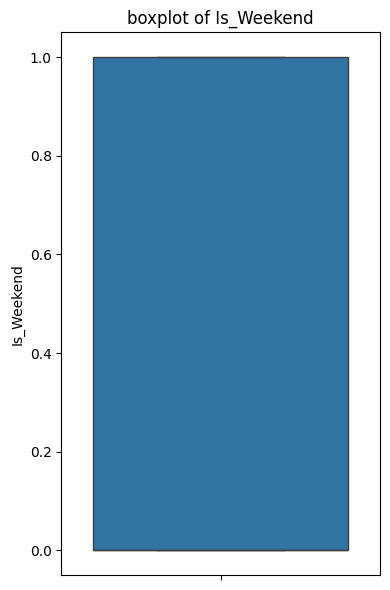

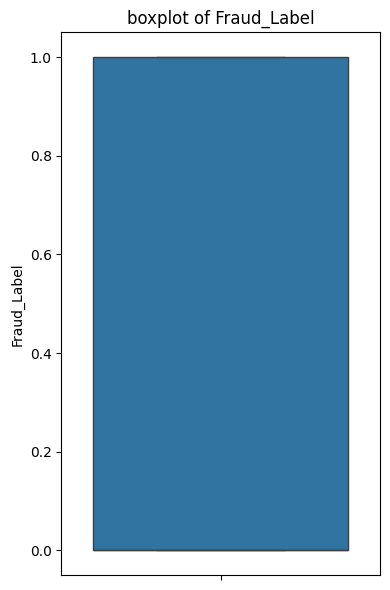

In [24]:
numeric_cols=df.select_dtypes(include=np.number).columns
for col in numeric_cols:
    plt.figure(figsize=(4,6))
    sns.boxplot(y=df[col])
    plt.title(f'boxplot of {col}',fontsize=12)
    plt.ylabel(col)
    plt.tight_layout()
    plt.show()

In [28]:
Q1=df['Transaction_Amount'].quantile(0.25)
Q3=df['Transaction_Amount'].quantile(0.75)
IQR=Q3-Q1
lower_bound=Q1-1.5*IQR
upper_bound=Q3+1.5*IQR

df=df[(df['Transaction_Amount']>=lower_bound)&(df['Transaction_Amount']<=upper_bound)]

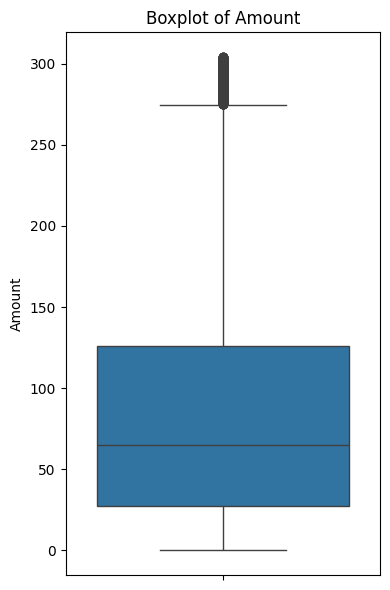

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(4,6))
sns.boxplot(y=df['Transaction_Amount'])
plt.title('Boxplot of Amount', fontsize=12)
plt.ylabel('Amount')
plt.tight_layout()
plt.show()

In [30]:
Q1=df['Transaction_Amount'].quantile(0.25)
Q3=df['Transaction_Amount'].quantile(0.75)
IQR=Q3-Q1
lower_bound=Q1-1.5*IQR
upper_bound=Q3+1.5*IQR

df=df[(df['Transaction_Amount']>=lower_bound)&(df['Transaction_Amount']<=upper_bound)]

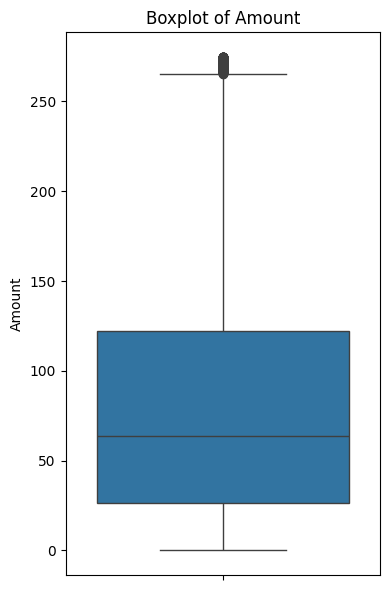

In [31]:
plt.figure(figsize=(4,6))
sns.boxplot(y=df['Transaction_Amount'])
plt.title('Boxplot of Amount', fontsize=12)
plt.ylabel('Amount')
plt.tight_layout()
plt.show()

In [32]:
Q1=df['Transaction_Amount'].quantile(0.25)
Q3=df['Transaction_Amount'].quantile(0.75)
IQR=Q3-Q1
lower_bound=Q1-1.5*IQR
upper_bound=Q3+1.5*IQR

df=df[(df['Transaction_Amount']>=lower_bound)&(df['Transaction_Amount']<=upper_bound)]

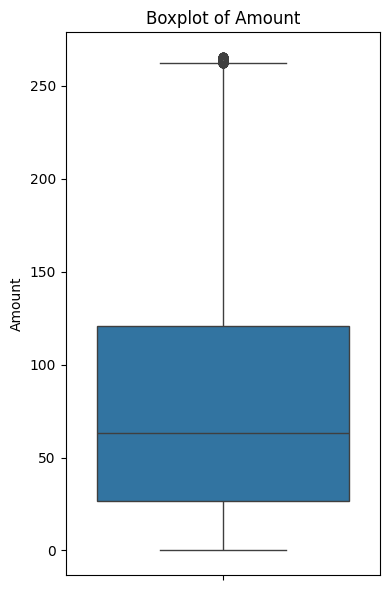

In [33]:
plt.figure(figsize=(4,6))
sns.boxplot(y=df['Transaction_Amount'])
plt.title('Boxplot of Amount', fontsize=12)
plt.ylabel('Amount')
plt.tight_layout()
plt.show()

In [34]:
Q1=df['Transaction_Amount'].quantile(0.25)
Q3=df['Transaction_Amount'].quantile(0.75)
IQR=Q3-Q1
lower_bound=Q1-1.5*IQR
upper_bound=Q3+1.5*IQR

df=df[(df['Transaction_Amount']>=lower_bound)&(df['Transaction_Amount']<=upper_bound)]

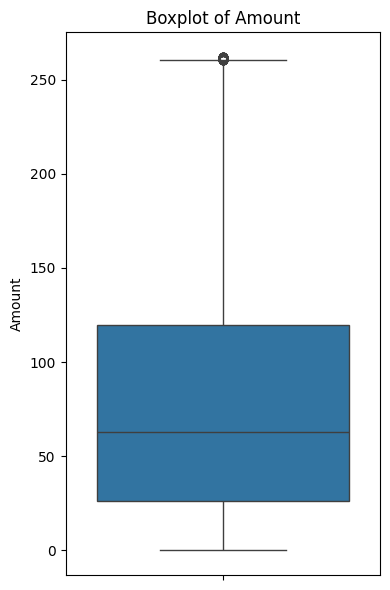

In [35]:
plt.figure(figsize=(4,6))
sns.boxplot(y=df['Transaction_Amount'])
plt.title('Boxplot of Amount', fontsize=12)
plt.ylabel('Amount')
plt.tight_layout()
plt.show()

In [36]:
Q1=df['Transaction_Amount'].quantile(0.25)
Q3=df['Transaction_Amount'].quantile(0.75)
IQR=Q3-Q1
lower_bound=Q1-1.5*IQR
upper_bound=Q3+1.5*IQR

df=df[(df['Transaction_Amount']>=lower_bound)&(df['Transaction_Amount']<=upper_bound)]

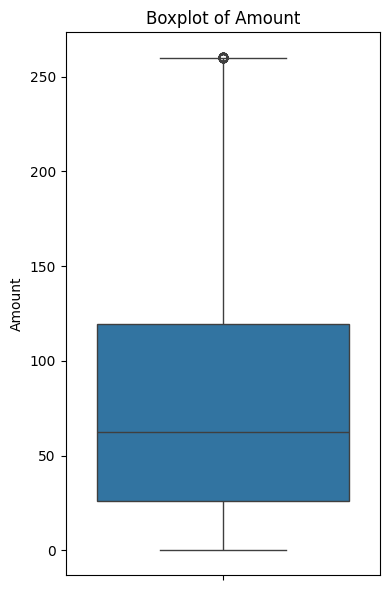

In [37]:
plt.figure(figsize=(4,6))
sns.boxplot(y=df['Transaction_Amount'])
plt.title('Boxplot of Amount', fontsize=12)
plt.ylabel('Amount')
plt.tight_layout()
plt.show()

In [38]:
Q1=df['Transaction_Amount'].quantile(0.25)
Q3=df['Transaction_Amount'].quantile(0.75)
IQR=Q3-Q1
lower_bound=Q1-1.5*IQR
upper_bound=Q3+1.5*IQR

df=df[(df['Transaction_Amount']>=lower_bound)&(df['Transaction_Amount']<=upper_bound)]

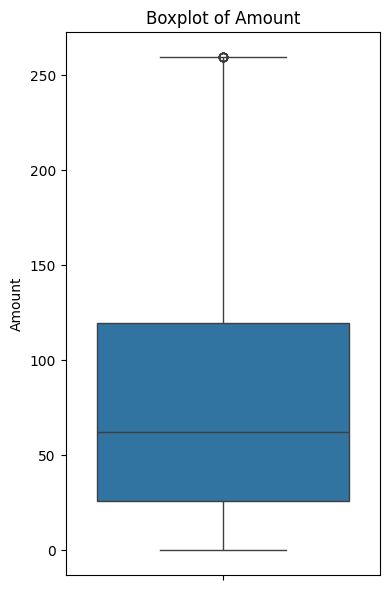

In [39]:
plt.figure(figsize=(4,6))
sns.boxplot(y=df['Transaction_Amount'])
plt.title('Boxplot of Amount', fontsize=12)
plt.ylabel('Amount')
plt.tight_layout()
plt.show()

In [40]:
Q1=df['Transaction_Amount'].quantile(0.25)
Q3=df['Transaction_Amount'].quantile(0.75)
IQR=Q3-Q1
lower_bound=Q1-1.5*IQR
upper_bound=Q3+1.5*IQR

df=df[(df['Transaction_Amount']>=lower_bound)&(df['Transaction_Amount']<=upper_bound)]

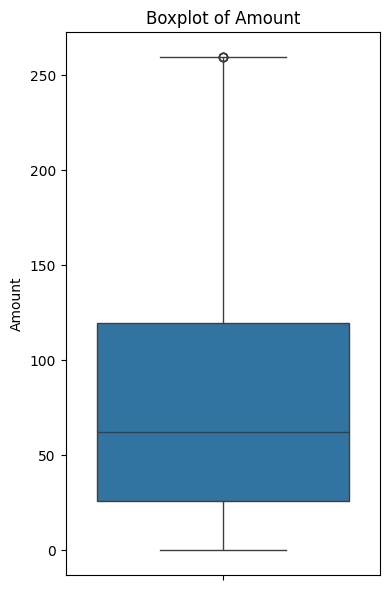

In [41]:
plt.figure(figsize=(4,6))
sns.boxplot(y=df['Transaction_Amount'])
plt.title('Boxplot of Amount', fontsize=12)
plt.ylabel('Amount')
plt.tight_layout()
plt.show()

In [42]:
df.head()

,Transaction_Amount,Transaction_Type,Account_Balance,Device_Type,Location,Merchant_Category,IP_Address_Flag,Previous_Fraudulent_Activity,Daily_Transaction_Count,Avg_Transaction_Amount_7d,Failed_Transaction_Count_7d,Card_Type,Card_Age,Transaction_Distance,Authentication_Method,Risk_Score,Is_Weekend,Fraud_Label
0,39.79,3,93213.17,0,3,4,0,0,7,437.63,3,0,65,883.17,0,0.8494,0,0
1,1.19,1,75725.25,1,2,0,0,0,13,478.76,4,2,186,2203.36,3,0.0959,0,1
2,28.96,2,1588.96,2,1,3,0,0,14,50.01,4,3,226,1909.29,0,0.8400,0,1
3,254.32,0,76807.20,2,2,0,0,0,8,182.48,4,3,76,1311.86,1,0.7935,0,1
4,31.28,3,92354.66,1,1,1,0,1,14,328.69,4,2,140,966.98,3,0.3819,1,1


In [64]:
drop_cols = [
    "IP_Address_Flag",
    "Location",
    "Device_Type",
    "Card_Type"
]

df = df.drop(columns=drop_cols)

In [65]:
df.head()

,Transaction_Amount,Transaction_Type,Account_Balance,Merchant_Category,Previous_Fraudulent_Activity,Daily_Transaction_Count,Avg_Transaction_Amount_7d,Failed_Transaction_Count_7d,Card_Age,Transaction_Distance,Authentication_Method,Risk_Score,Is_Weekend,Fraud_Label
0,39.79,3,93213.17,4,0,7,437.63,3,65,883.17,0,0.8494,0,0
1,1.19,1,75725.25,0,0,13,478.76,4,186,2203.36,3,0.0959,0,1
2,28.96,2,1588.96,3,0,14,50.01,4,226,1909.29,0,0.8400,0,1
3,254.32,0,76807.20,0,0,8,182.48,4,76,1311.86,1,0.7935,0,1
4,31.28,3,92354.66,1,1,14,328.69,4,140,966.98,3,0.3819,1,1


In [68]:
print(X.columns)
print("Total features:", X.shape[1])

Index(['Transaction_Amount', 'Transaction_Type', 'Account_Balance',
       'Device_Type', 'Location', 'Merchant_Category', 'IP_Address_Flag',
       'Previous_Fraudulent_Activity', 'Daily_Transaction_Count',
       'Avg_Transaction_Amount_7d', 'Failed_Transaction_Count_7d', 'Card_Type',
       'Card_Age', 'Transaction_Distance', 'Authentication_Method',
       'Risk_Score', 'Is_Weekend'],
      dtype='object')
Total features: 17


In [69]:
print(df['Fraud_Label'].value_counts())
print(df['Fraud_Label'].unique())

Fraud_Label
0    31495
1    14900
Name: count, dtype: int64
[0 1]


### 6.Class Imbalance(SMOTE)

In [70]:
from imblearn.over_sampling import SMOTE

In [45]:
X = df.drop("Fraud_Label", axis=1)
y = df["Fraud_Label"]

# Check imbalance
print("Before SMOTE:\n", y.value_counts())

# Handle imbalance (multi-class SMOTE)
smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X, y)

print("After SMOTE:\n", y_res.value_counts())

Before SMOTE:
 Fraud_Label
0    31495
1    14900
Name: count, dtype: int64
After SMOTE:
 Fraud_Label
0    31495
1    31495
Name: count, dtype: int64


### 7.Train-Test Split

In [46]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2, random_state=42, stratify=y_res)

### 8.Training Models

In [48]:
log_reg = LogisticRegression(max_iter=2000, class_weight="balanced", multi_class="multinomial", solver="lbfgs")
log_reg.fit(X_train, y_train)
y_pred = log_reg.predict(X_test)
print("\nLogistic Regression Results:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

C:\Users\Pavithra R\AppData\Roaming\Python\Python313\site-packages\sklearn\linear_model\_logistic.py:1262: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, binary problems will be fit as proper binary  logistic regression models (as if multi_class='ovr' were set). Leave it to its default value to avoid this warning.
  warnings.warn(



Logistic Regression Results:
Accuracy: 0.7844896015240514
[[4752 1547]
 [1168 5131]]
              precision    recall  f1-score   support

           0       0.80      0.75      0.78      6299
           1       0.77      0.81      0.79      6299

    accuracy                           0.78     12598
   macro avg       0.79      0.78      0.78     12598
weighted avg       0.79      0.78      0.78     12598



C:\Users\Pavithra R\AppData\Roaming\Python\Python313\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 2000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=2000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [49]:
dt = DecisionTreeClassifier(class_weight="balanced", random_state=42)
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)
print("\nDecision Tree Results:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


Decision Tree Results:
Accuracy: 0.9210985870773138
[[5752  547]
 [ 447 5852]]
              precision    recall  f1-score   support

           0       0.93      0.91      0.92      6299
           1       0.91      0.93      0.92      6299

    accuracy                           0.92     12598
   macro avg       0.92      0.92      0.92     12598
weighted avg       0.92      0.92      0.92     12598



In [50]:
rf = RandomForestClassifier(n_estimators=200, class_weight="balanced", random_state=42)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
print("\nRandom Forest Results:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))



Random Forest Results:
Accuracy: 0.9520558818860136
[[6129  170]
 [ 434 5865]]
              precision    recall  f1-score   support

           0       0.93      0.97      0.95      6299
           1       0.97      0.93      0.95      6299

    accuracy                           0.95     12598
   macro avg       0.95      0.95      0.95     12598
weighted avg       0.95      0.95      0.95     12598



In [51]:
xgb = XGBClassifier(eval_metric="mlogloss", use_label_encoder=False, random_state=42)
xgb.fit(X_train, y_train)
y_pred = xgb.predict(X_test)
print("\nXGBoost Results:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

C:\Users\Pavithra R\AppData\Roaming\Python\Python313\site-packages\xgboost\training.py:183: UserWarning: [10:48:01] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



XGBoost Results:
Accuracy: 0.9538021908239404
[[6073  226]
 [ 356 5943]]
              precision    recall  f1-score   support

           0       0.94      0.96      0.95      6299
           1       0.96      0.94      0.95      6299

    accuracy                           0.95     12598
   macro avg       0.95      0.95      0.95     12598
weighted avg       0.95      0.95      0.95     12598



In [52]:
lgbm = LGBMClassifier(random_state=42)
lgbm.fit(X_train, y_train)
y_pred = lgbm.predict(X_test)
print("\nLightGBM Results:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[LightGBM] [Info] Number of positive: 25196, number of negative: 25196
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003293 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1566
[LightGBM] [Info] Number of data points in the train set: 50392, number of used features: 17
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000

LightGBM Results:
Accuracy: 0.9516589934910303
[[6100  199]
 [ 410 5889]]
              precision    recall  f1-score   support

           0       0.94      0.97      0.95      6299
           1       0.97      0.93      0.95      6299

    accuracy                           0.95     12598
   macro avg       0.95      0.95      0.95     12598
weighted avg       0.95      0.95      0.95     12598



In [55]:
from tensorflow.keras.callbacks import EarlyStopping

dnn = Sequential([
    Dense(256, activation='relu', input_shape=(X_train.shape[1],)),
    BatchNormalization(),
    Dropout(0.4),
    Dense(128, activation='relu'),
    BatchNormalization(),
    Dropout(0.3),
    Dense(128, activation='relu'),
    BatchNormalization(),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

dnn.compile(
    optimizer=Adam(learning_rate=0.0005),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

early_stop = EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)

history = dnn.fit(
    X_train, y_train,
    epochs=100,
    batch_size=32,
    validation_split=0.2,
    callbacks=[early_stop],
    verbose=1
)

# Evaluate model
y_pred = (dnn.predict(X_test) > 0.5).astype("int32")

print("\nDNN Results:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

C:\Users\Pavithra R\AppData\Roaming\Python\Python313\site-packages\keras\src\layers\core\dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
1260/1260 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.4960 - loss: 0.7208 - val_accuracy: 0.4957 - val_loss: 0.6996
Epoch 2/100
1260/1260 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.4979 - loss: 0.7022 - val_accuracy: 0.4990 - val_loss: 0.6971
Epoch 3/100
1260/1260 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.4944 - loss: 0.6996 - val_accuracy: 0.5007 - val_loss: 0.6941
Epoch 4/100
1260/1260 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.4966 - loss: 0.6972 - val_accuracy: 0.4973 - val_loss: 0.6938
Epoch 5/100
1260/1260 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.5013 - loss: 0.6970 - val_accuracy: 0.4966 - val_loss: 0.6965
Epoch 6/100
1260/1260 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.4998 - loss: 0.6958 - val_accuracy: 0.5066 - val_loss: 0.6958
Epoch 7/100
1260/1260 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step - accuracy: 0.4977 - loss: 0.6954 - val_accuracy: 0.5005 - val_loss: 0.6961
Epoch 8/100
1260/1260 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.5008 - loss:

In [63]:
import joblib

joblib.dump(rf, "random_forest_model.pkl")

['random_forest_model.pkl']